# Outlier Kakao Trend Search
* 3-1-2. 급상승 음원 소셜미디어 관심도
    * kakao_trend/outlier/{title}_{artist}.xls
    * kakao_trend/outlier/{title}_{artist}.png

## 필요 라이브러리 로드

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, math

In [29]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [30]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [31]:
from selenium import webdriver
import chromedriver_autoinstaller as ca
import random, time

In [32]:
import shutil

## 날짜 설정

In [33]:
# 기간 설정
start_date = '2022-05-16'
end_date = '2022-05-22'

In [34]:
f_path = 'c:/data/Wantreez/Crawling/music'
try:
    os.chdir(f_path)
except:
    pass

In [35]:
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/music'

In [36]:
# 실시간 순위 파일 폴더로 이동
save_folder = f'crawled_data/outlier_data/{start_date}_{end_date}'
week_outlier_folder = os.path.join(code_path, save_folder)
week_outlier_folder

'c:/data/Wantreez/Crawling/music\\crawled_data/outlier_data/2022-05-16_2022-05-22'

In [37]:
file_list = os.listdir(week_outlier_folder)
file_list

['2022-05-16_2022-05-22_agency_in_chart.xlsx',
 '2022-05-16_2022-05-22_mean_outlier_agency.xlsx',
 '2022-05-16_2022-05-22_Top10_rank_change_df.xlsx',
 '2022-05-16_2022-05-22_Top50_100_rank_change_df.xlsx',
 '2022-05-16_2022-05-22_Top50_rank_change_df.xlsx',
 '2022-05-16_2022-05-22_total_outlier.png',
 '2022-05-16_2022-05-22_total_outlier.xlsx',
 'bugs',
 'flo',
 'genie',
 'google_trend',
 'kakao_trend',
 'melon',
 'naver_datalab',
 'vibe',
 '[bugs]2022-05-16_2022-05-22_pop_df.xlsx',
 '[flo]2022-05-16_2022-05-22_pop_df.xlsx',
 '[genie]2022-05-16_2022-05-22_pop_df.xlsx',
 '[ky]2022-05-16_2022-05-22_pop_df.xlsx',
 '[melon]2022-05-16_2022-05-22_pop_df.xlsx',
 '[tj]2022-05-16_2022-05-22_pop_df.xlsx',
 '[vibe]2022-05-16_2022-05-22_pop_df.xlsx']

In [38]:
# 이상치 음원 파일 가져오기
for one in file_list:
    if 'total_outlier' in one:
        file_name = one
file_name

'2022-05-16_2022-05-22_total_outlier.xlsx'

In [39]:
outlier_path = os.path.join(week_outlier_folder, file_name)
df = pd.read_excel(outlier_path)
df

,날짜,순위변동평균(양수),곡,가수,소속사,순위,앨범,소속사_분류,순위변동,사이트
0,2022-05-19,31.0,Dynamite,방탄소년단,빅히트,42,Dynamite (DayTime Version),빅히트,31,Bugs
1,2022-05-19,31.0,Real Love,오마이걸(OH MY GIRL),WM,40,Real Love,기타,34,Bugs
2,2022-05-18,56.0,Whisky on the Rock,김연지,개인,37,우리들의 블루스 OST Part 1,기타,33,Bugs
3,2022-05-22,33.0,꽃 길,BIGBANG (빅뱅),YG,62,꽃 길,YG,33,Bugs
4,2022-05-21,44.0,둘이서 떠나요,다비치,WAKE ONE,51,Season Note,기타,44,Bugs
5,2022-05-19,33.0,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴(Paul Kim),neuron music,61,'키스 먼저 할까요?' OST Part.3,기타,13,Bugs
6,2022-05-18,41.0,밤이 깊었네 (feat. 헤이즈),싸이 (PSY),P NATION,30,싸다9,기타,41,Bugs
7,2022-05-20,43.0,"스물다섯, 스물하나",자우림(Jaurim),인터파크 엔터테인먼트,40,"Goodbye, grief.",기타,43,Bugs
8,2022-05-18,44.5,우리들의 블루스,임영웅,물고기뮤직,17,IM HERO,기타,49,Bugs
9,2022-05-19,31.0,존재만으로,원슈타인,개인,60,스물다섯 스물하나 OST Part 4,기타,31,Bugs


## 3-1-2. 급상승 음원 소셜미디어 관심도(엑셀)

In [40]:
kakao_trend_path = f'crawled_data/outlier_data/{start_date}_{end_date}/kakao_trend/outliers'
des = os.path.join(code_path, kakao_trend_path)
des

'c:/data/Wantreez/Crawling/music\\crawled_data/outlier_data/2022-05-16_2022-05-22/kakao_trend/outliers'

In [41]:
os.makedirs(des, exist_ok=True)

### 다운로드 폴더 설정

In [42]:
# 다운로드 폴더, 파일 이름 설정
down_folder = 'C:/Users/kbjung/Downloads/'
down_xls = 'datatrend.xls'

In [43]:
ca.install(True)
driver = webdriver.Chrome()

In [44]:
for i in range(df.shape[0]):
    # 카카오 트랜드 접속
    url = 'https://datatrend.kakao.com/'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()

    # 검색어 입력
    word = df['곡'][i]
    search_box = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[1]/div/input')
    search_box.clear()
    time.sleep( random.uniform(1, 1.5) )
    search_box.send_keys(word)

    # 1개월 picker 클릭
    time_picker = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[1]/div[2]/label[2]/span').click()
    time.sleep( random.uniform(1, 1.5) )

    # 검색 버튼 클릭
    search_button = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[4]/button[2]').click()
    time.sleep( random.uniform(1, 1.5) )
    driver.implicitly_wait(3)
    try:
        # 다운 버튼 클릭
        down_button = driver.find_element_by_xpath('/html/body/div/div/header/div/div/a[2]').click()
        time.sleep( random.uniform(1, 1.5) )

        # 파일 이름 변경
        title = df['곡'][i]
        artist = df['가수'][i]
        new_down_xls = f'{title}_{artist}.xls'
        os.rename(down_folder + down_xls, down_folder + new_down_xls)

        # 파일 이동
        new_down_path = os.path.join(des, new_down_xls)
        shutil.move(down_folder + new_down_xls, new_down_path)
        print(f'{new_down_xls} 완료.')
    except:
        pass
print('수집 완료.')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_7988/677869929.py:11: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[1]/div/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_7988/677869929.py:17: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[1]/div[2]/label[2]/span').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_7988/677869929.py:21: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_button = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[4]/button[2]').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_7988/677869929.py:26: DeprecationWarning: find_element_by_xpath 

Dynamite_방탄소년단.xls 완료.
Real Love_오마이걸(OH MY GIRL).xls 완료.
Whisky on the Rock_김연지.xls 완료.
꽃 길_BIGBANG (빅뱅).xls 완료.
스물다섯, 스물하나_자우림(Jaurim).xls 완료.
우리들의 블루스_임영웅.xls 완료.
존재만으로_원슈타인.xls 완료.
함부로 다정하게_송하예.xls 완료.
YOU AND I_WSG워너비 조별경연 (대청봉).xls 완료.
수집 완료.


In [45]:
driver.quit()

## 이상치 노래 그래프(테스트)

In [46]:
outlier_file_list = os.listdir(des)
outlier_file_list

['Dynamite_방탄소년단.xls',
 'Real Love_오마이걸(OH MY GIRL).xls',
 'Whisky on the Rock_김연지.xls',
 'YOU AND I_WSG워너비 조별경연 (대청봉).xls',
 '꽃 길_BIGBANG (빅뱅).xls',
 '스물다섯, 스물하나_자우림(Jaurim).xls',
 '우리들의 블루스_임영웅.xls',
 '존재만으로_원슈타인.xls',
 '함부로 다정하게_송하예.xls']

In [47]:
one = outlier_file_list[0]
title = one.split('_')[0]
artist = one.split('_')[1].split('.')[0]
one_path = os.path.join(des, one)
temp = pd.read_excel(one_path).reset_index(drop=True)
temp = temp.iloc[7:38, :].reset_index(drop=True)
temp.columns = ['날짜', '검색비율']
temp['날짜'] = temp['날짜'].astype(str)
temp.head()

,날짜,검색비율
0,2022-04-23 00:00:00,54
1,2022-04-24 00:00:00,0
2,2022-04-25 00:00:00,0
3,2022-04-26 00:00:00,38
4,2022-04-27 00:00:00,38


In [48]:
temp['날짜'] = temp['날짜'].apply([lambda x: x.split(' ')[0]])
temp.head()

,날짜,검색비율
0,2022-04-23,54
1,2022-04-24,0
2,2022-04-25,0
3,2022-04-26,38
4,2022-04-27,38


In [49]:
temp.tail()

,날짜,검색비율
26,2022-05-19,0
27,2022-05-20,0
28,2022-05-21,0
29,2022-05-22,0
30,2022-05-23,38


In [50]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      31 non-null     object
 1   검색비율    31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [51]:
week_temp = temp[ (temp['날짜'] >= start_date) & (temp['날짜'] <= end_date)].reset_index(drop=True)
week_temp

,날짜,검색비율
0,2022-05-16,38
1,2022-05-17,38
2,2022-05-18,0
3,2022-05-19,0
4,2022-05-20,0
5,2022-05-21,0
6,2022-05-22,0


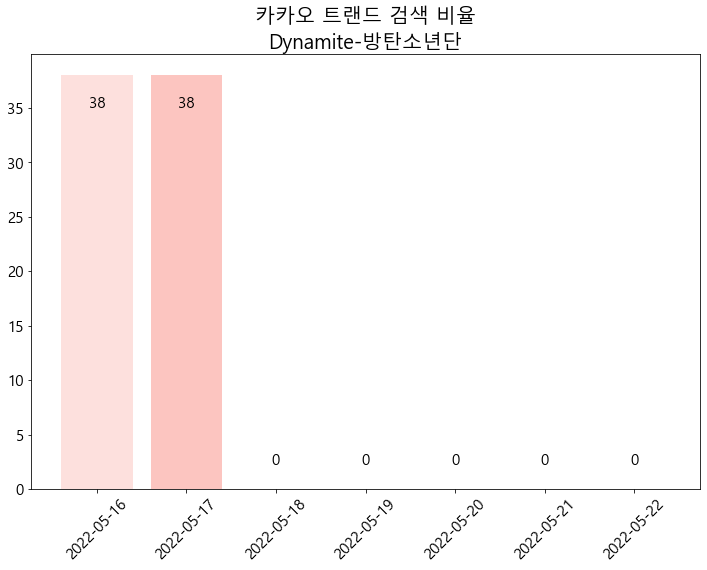

In [52]:
colors = sns.color_palette('RdPu', week_temp.shape[0])
x = week_temp['날짜']
y = week_temp['검색비율']
try:
        interval_ratio = math.ceil( max(y) )*0.05
        interval_ratio2 = math.ceil( max(y) )*0.2
        plt.figure( figsize=(12,8) )
        plt.bar(x, y, color=colors)
        plt.title(f"카카오 트랜드 검색 비율\n{title}-{artist}", fontsize=20)
        plt.xticks(fontsize=15,rotation=45)
        plt.yticks(fontsize=15)
        for i in range( len(y) ):
                if y[i] <= interval_ratio2:
                        plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='bottom')
                else:
                        plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='top')
except:
        pass

## 3-1-2. 급상승 음원 소셜미디어 관심도(그래프)

Dynamite_방탄소년단.png 저장 완료.
Real Love_오마이걸(OH MY GIRL).png 저장 완료.
Whisky on the Rock_김연지.png 저장 완료.
YOU AND I_WSG워너비 조별경연 (대청봉).png 저장 완료.
꽃 길_BIGBANG (빅뱅).png 저장 완료.
스물다섯, 스물하나_자우림(Jaurim).png 저장 완료.
우리들의 블루스_임영웅.png 저장 완료.
존재만으로_원슈타인.png 저장 완료.
함부로 다정하게_송하예.png 저장 완료.


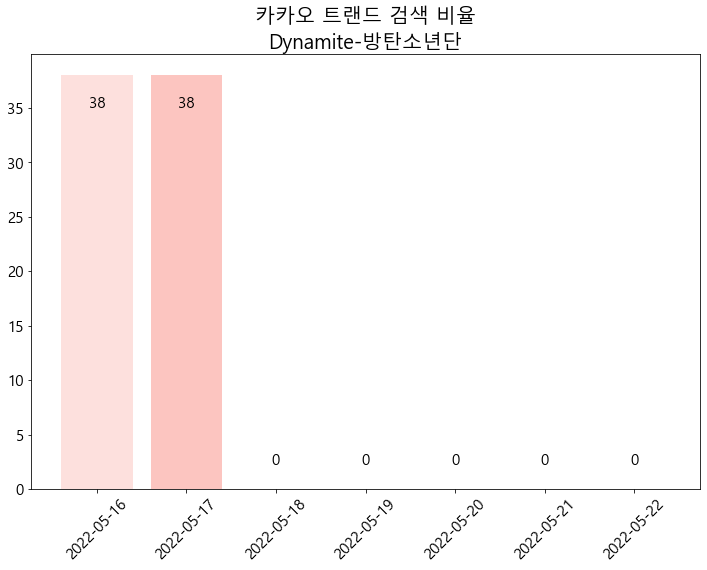

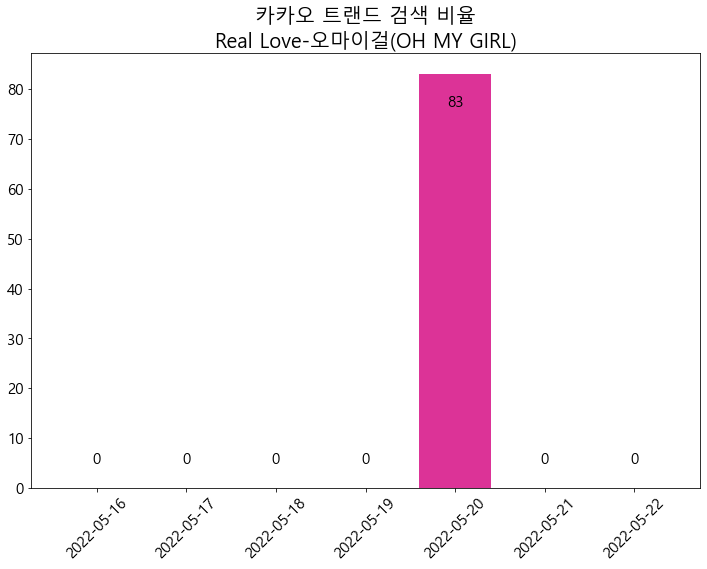

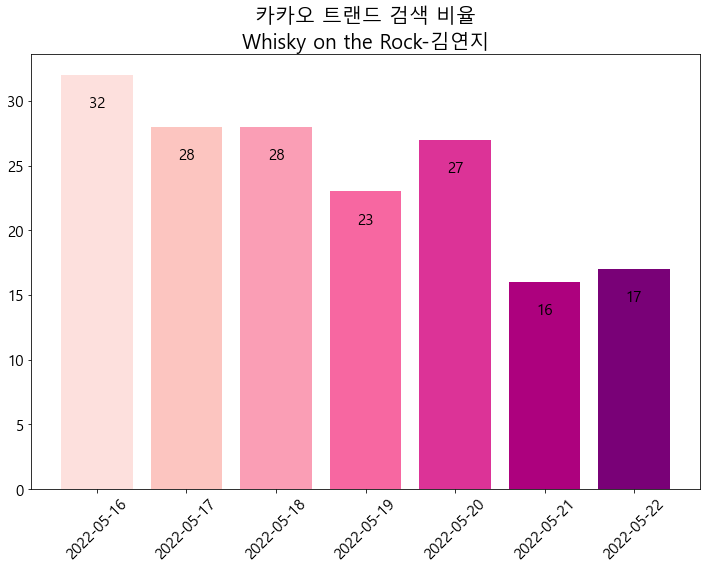

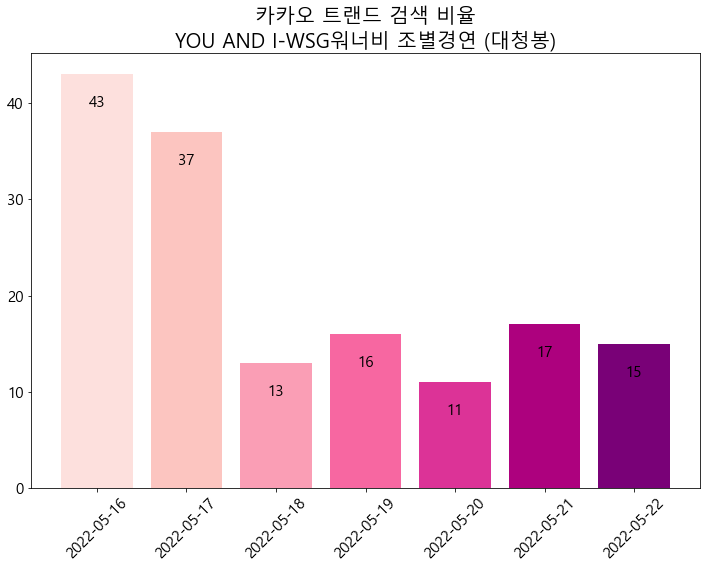

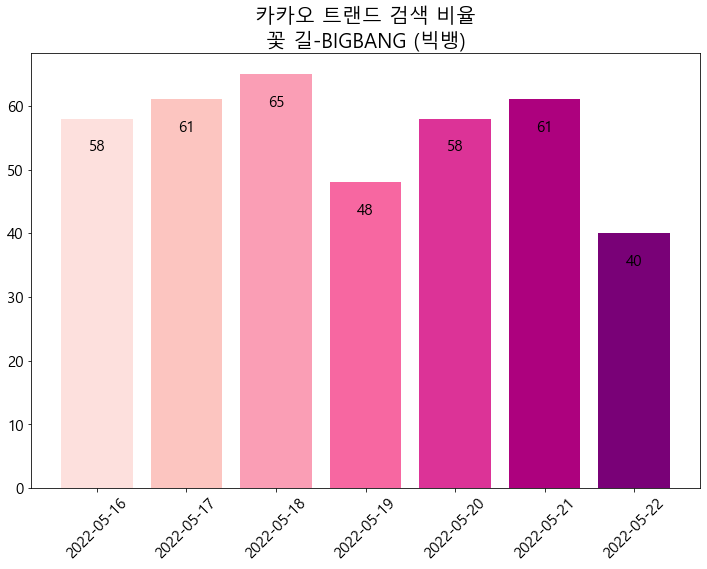

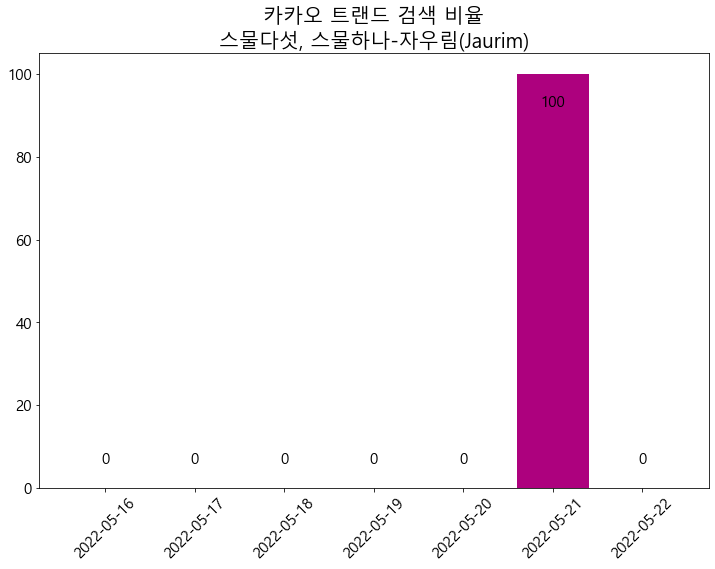

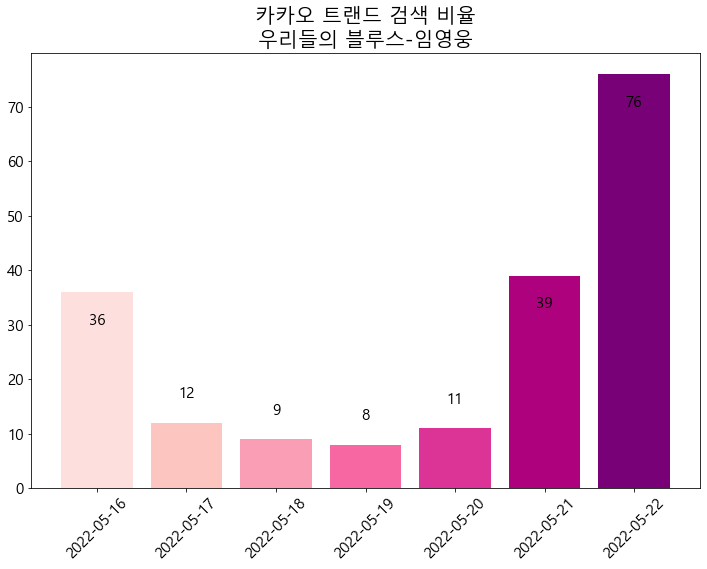

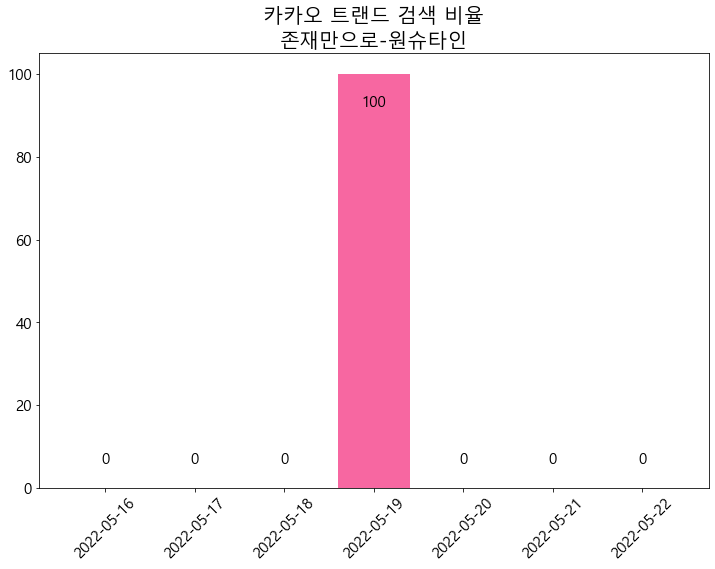

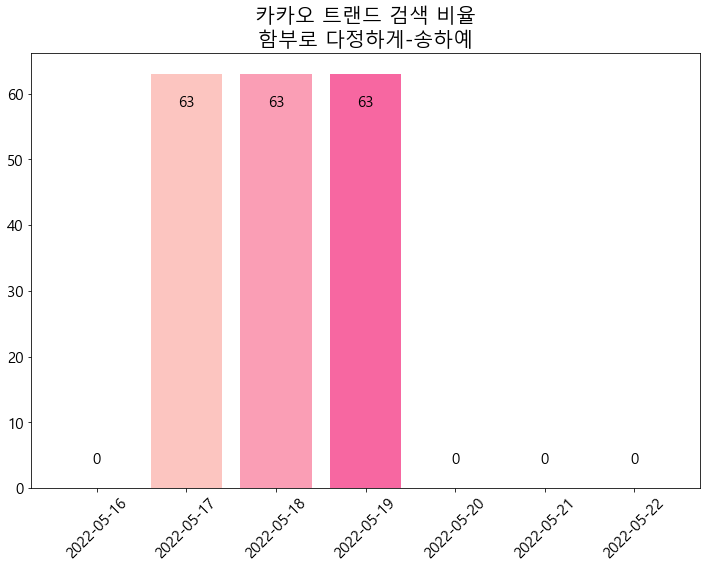

In [53]:
for one in outlier_file_list:
    title = one.split('_')[0]
    artist = one.split('_')[1].split('.')[0]
    one_path = os.path.join(des, one)
    temp = pd.read_excel(one_path).reset_index(drop=True)
    temp = temp.iloc[7:38, :].reset_index(drop=True)
    temp.columns = ['날짜', '검색비율']
    temp['날짜'] = temp['날짜'].astype(str)
    temp['날짜'] = temp['날짜'].apply([lambda x: x.split(' ')[0]])
    week_temp = temp[ (temp['날짜'] >= start_date) & (temp['날짜'] <= end_date)].reset_index(drop=True)
    
    colors = sns.color_palette('RdPu', week_temp.shape[0])
    x = week_temp['날짜']
    y = week_temp['검색비율']
    try:
        interval_ratio = math.ceil( max(y) )*0.05
        interval_ratio2 = math.ceil( max(y) )*0.2
        plt.figure( figsize=(12,8) )
        plt.bar(x, y, color=colors)
        plt.title(f"카카오 트랜드 검색 비율\n{title}-{artist}", fontsize=20)
        plt.xticks(fontsize=15,rotation=45)
        plt.yticks(fontsize=15)
        for i in range( len(y) ):
                if y[i] <= interval_ratio2:
                        plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='bottom')
                else:
                        plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='top')
        file_name2 = f'{title}_{artist}.png'
        save_img_path = os.path.join(des, file_name2)
        plt.savefig(save_img_path)
        print(f'{file_name2} 저장 완료.')
    except:
        pass

# 코드 마지막